In [1]:
# Install Tesseract and its language data
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ara  # Arabic language model
!apt-get install -y libtesseract-dev

# Install the necessary Python libraries
!pip install pytesseract pillow opencv-python-headless

!pip install easyocr

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,153 kB]
Get:14 http://security.ubuntu.co

In [2]:
import pytesseract
from PIL import Image
import cv2
import os

In [3]:
image_path = '/content/25.jpg'

In [5]:
# Load the image
image = cv2.imread(image_path)

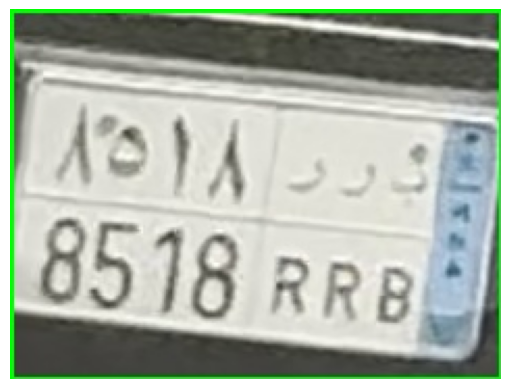

In [6]:
# Display the image to ensure it's loaded correctly
def display_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

display_image(image)

In [ ]:
#def preprocess_image(image_path):
#    # Read the image
#    image = cv2.imread(image_path)
#
#    # Convert to grayscale
#    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#
#    # Apply a threshold to get a binary image (binarization)
#    gray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#
#    # Apply dilation and erosion to remove small noise
#    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#    gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
#
#    # Save the preprocessed image for inspection
#    cv2.imwrite("preprocessed_image.png", gray)
#
#    return gray
#
## Preprocess the image and save it temporarily
#gray = preprocess_image(image_path)
#
## Perform OCR using Tesseract
#temp_filename = "temp_image.png"
#cv2.imwrite(temp_filename, gray)
#
## Run OCR on the preprocessed image
#text = pytesseract.image_to_string(Image.open(temp_filename), lang='eng+ara')
#print(text)

In [ ]:
# List available languages for Tesseract
print(pytesseract.get_languages(config=''))

['ara', 'eng', 'osd']


In [ ]:
#def preprocess_image(image_path):
#    # Read the image
#    image = cv2.imread(image_path)
#
#    # Convert to grayscale
#    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#
#    # Apply threshold to remove noise
#    gray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
#
#    # Dilation to connect text structures
#    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
#    gray = cv2.dilate(gray, kernel, iterations=1)
#
#    # Save the preprocessed image for inspection
#    cv2.imwrite("preprocessed_image.png", gray)
#
#    return gray
#
## Preprocess and save the image
#gray = preprocess_image(image_path)
#
## Display the preprocessed image
#plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
#plt.axis('off')
#plt.show()
#
## OCR on the preprocessed image
#recognized_text = pytesseract.image_to_string(Image.open("preprocessed_image.png"), lang='eng+ara')
#print("Recognized Text: \n", recognized_text)
#

In [8]:
# Grayscale conversion
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Noise removal
def remove_noise(image):
  return cv2.medianBlur(image, 5)

# Sharpening
def sharpen_image(image):
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])  # Sharpening kernel
    return cv2.filter2D(image, -1, kernel)

# Binarization
def binarize_image(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


# Helper display function
#def display_image(image, is_rgb=False):
#    if is_rgb:
#        # OpenCV loads images in BGR format by default, so we have to convert BGR to RGB for proper color display
#        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#        plt.imshow(image)
#    else:
#        plt.imshow(image, cmap='gray')
#    #plt.title(title)
#    plt.axis('off')
#    plt.show()


In [11]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Initialize the reader for Arabic ('ar') and English ('en')
reader = easyocr.Reader(['ar', 'en'])

# Function to perform OCR using EasyOCR
def ocr_image_easyocr(image):
    # Read image and run OCR
    results = reader.readtext(image)

    # Extract and print detected text
    detected_text = " ".join([result[1] for result in results])

    return detected_text

recognized_text = ocr_image_easyocr(image)
print("Recognized Text: \n", recognized_text)


Recognized Text: 
 ادرر 8518 RR8 ٨٥١٨
